In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Laboratorio 1

En este laboratorio se busca resolver de manera analítica y simulada un circuito RC, RL y un circuito LC.

En el caso de los circuitos RC y RL, se realizará la comparación entre lo simulado y lo implementado en el laboratorio de electrónica.

**Objetivos:**

1. Análisis de circuitos de primer orden RL y RC: Se busca comprender el comportamiento transitorio de circuitos RL (resistencia-inductancia) y RC (resistencia-capacitancia) al conectar o desconectar un generador de señales.

2. Verificación de tiempos de carga y descarga: Se demostrará y compararán los tiempos necesarios para que los circuitos alcancen el régimen estacionario de corrientes y diferencias de potencial después de la conexión o desconexión del generador utilizando métodos de análisis numérico en Google Colab.

3. Uso de herramientas de análisis: Se pretende familiarizarse con la implementación de métodos numéricos en Google Colab para resolver circuitos de manera computacional y graficar resultados.

4. Comparación de resultados: Se contrastarán los resultados obtenidos mediante análisis numérico en Google Colab con los obtenidos de manera analítica y experimental para validar la precisión y la consistencia entre estos tres métodos de análisis.








In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import scipy.linalg as scl
from scipy.signal import square


## Circuito RC

Los circuitos RC son cruciales para la electrónica en muchas cosas, para abordar el circuito RC.

Para resolver el circuito RC, se debe saber nociones básicas las cuales nos darán pie para empezar, siendo que podemos describir la corriente del capacitor de la siguiente manera:
$$Q_c = CV_c$$
Noté que se puede derivar, donde la derivada de $Q$ será la corriente eléctrica del condensador.
$$\frac{dQ_C}{dt} = C\frac{dV_C}{dt} $$
donde:

* $ I_C(t) = C \frac{dV_C}{dt}$
* $ Q_C = C V_C $
* $ V_R = RI_R$

## RC paralelo

Para resolver el RC en paralelo, me basaré en el siguiente circuito:

![Circuito RC en paralelo](https://drive.google.com/uc?id=1NINEmBkzxrrZEGj539M2n3iQpRQwp4wf)

Donde la corriente se reparte en la resistencia y el condensador, por lo tanto aplicaremos LCK:
#### LCK

Tomando como nodo la unión entre la resistencia y el condensador,obtenemos la siguiente ecuación:
$$ I_C + I_R = 0 $$
ahora aplicamos la definición de $I_C$, por lo tanto:
$$ C \frac{dV_C}{dt} + I_R = 0 $$
despejamos nuestra ecuación diferencial.
$$ \frac{dV_C}{dt} = - \frac{1}{C}I_R$$
utilizamos la definición de $I_R$, entonces:
$$ \frac{dV_C}{dt} = - \frac{1}{RC}V_R$$
Analizando el circuito, podremos notar que $R$ y $C$ están en paralelo, por lo tanto su voltaje es el mismo. Esto modifica la EDO de la siguiente manera:

$$ \frac{dV_C}{dt} = - \frac{1}{RC}V_C. $$

planteo nuestra condición inicial. $V_C(t=0) = V_0$

ahora resolvamos nuestro problema:
1. Multiplico a ambos lados de la ecuación por $\frac{dt}{V_C}$.
$$ \frac{1}{V_C}dV_C = - \frac{1}{RC}dt$$
2. Aplico integral definida desde un voltaje inicial $V_0 $ y un tiempo inicial $t_0$ hasta $V_C$ y $t$ respectivamente.
$$ \int_{V_0}^{V_C} \frac{1}{V_C}dV_C = - \int_{t_0}^{t} \frac{1}{RC}dt$$
3. Integro.
$$ \ln{|V|} |_{V_0}^{V_C} = - \frac{1}{RC} t|_{t_0}^{t} $$
4. Aplicamos los límites y distribuimos nuestra ecuación.
$$ \ln{|V_C|} -\ln{|V_0|} = - \frac{1}{RC} ( t - t_0) $$
5. Aplico propiedades de los logaritmos:
$$ \ln{\frac{|V_C|}{|V_0|}} = - \frac{1}{RC} ( t - t_0) $$
6. Aplicamos exponencial a ambos lados de nuestra ecuación.
$$ e^{ \ln{\frac{|V_C|}{|V_0|}}} = e^{-\frac{1}{RC} ( t - t_0) } $$
7. Aplicamos propiedades de logaritmos y exponenciales:
$$ \frac{|V_C|}{|V_0|} = e^{-\frac{1}{RC} ( t - t_0) } $$
8. Despejamos nuestra variable $V_C$.
$$ V_C = V_0e^{-\frac{1}{RC} ( t - t_0)} $$
9. Recordemos que nuestra variable $V_C$ es dependiente del tiempo, por lo tanto $ V_C = V_C(t)$
$$ V_C(t) = V_0e^{-\frac{1}{RC} ( t - t_0)} $$
10. Aplicamos nuestra condición inicial.
$$ V_C(t=0) \rightarrow V_0e^{-\frac{1}{RC} ( 0 - t_0)} = V_0$$
$$ V_C(t=0) \rightarrow e^{-\frac{1}{RC} ( 0 - t_0)} = 1$$
pero para que una exponencial sea $1$, entonces su exponente debe ser cero, pero $R$ y $C$ no son infinitos, por lo tanto, $t_0 = 0$.
11. Solución de la descarga de un condensador.
$$ V_C(t) = V_0e^{-\frac{1}{RC}t} $$

## RC serie

Para el RC en serie, aplicaré la función conocida respecto al voltaje del condensador y así mismo obtendre una respuesta forzada. Tomaré como punto de referencia el siguiente circuito:

![Circuito RC en serie](https://drive.google.com/uc?id=12_VKsCwH1f0qOcUF0f01HLCyRf9bQuY4)

Las condiciones para el circuito son:
* $V_C(t=0) = 0$.
* $V_C(t → \infty) = V_0$, donde $V_0$ es la fuente de entrada.

Entonces tomo la anterior función de $V_C$ y la apropio a las condiciones:
1. Uso la anterior ecuación:
$$ V_C(t) = V_0e^{-\frac{1}{RC}t} $$
2. Aplico que  $V_C(t=0)=0$

$ V_C(t=0) \rightarrow V_0e^{-\frac{1}{RC}0} = 0$

$ V_C(t=0) \rightarrow V_0 = 0$

Esto significa que se debe restar $V_0$.
3. Reescribo la función $V_C$.
$$ V_C(t) = V_0e^{-\frac{1}{RC}t} - V_0 $$
4. Verifrico que $V_C(t → \infty) = V_S$.

$ V_C(t \rightarrow \infty) \rightarrow V_0e^{-\frac{1}{RC}t} - V_0 = V_0 $

$ V_C(t \rightarrow \infty) \rightarrow V_00 - V_0 = V_0 $

Esto significa que a la función se le deben cambiar los signos para que tenga equivalencia.
5. Reescribo la función $V_C$.
$$ V_C(t) = -V_0e^{-\frac{1}{RC}t} + V_0 $$

Para reducir un poco más la función, se sabe que $R*C = \tau$, ya que se relaciona con el tiempo, puesto que $\Omega 𝙵 = S$.

* Carga $\rightarrow V_C(t) = V_0e^{-\frac{1}{\tau}t} $

* Descarga $\rightarrow V_C(t) = -V_0e^{-\frac{1}{\tau}t} + V_0 $

Utilizaré la programación para aproximar la carga y descarga de un condensador y demostrar que solo se necesitan 5$\tau$ para que el condensador esté cargado o descargado completamente. Además de esto, voy a graficar la carga $Q_C$ del condensador y su corriente $I_C$, pero primero debo encontrarlas.
* Para encontrar la carga. $Q_C$ se tiene que $Q_C = CV_C$ pero ya tengo $V_C$, entonces nuestra carga queda de la siguiente manera. $ Q_C(t) = CV_C(t)$
* Para encontrar la corriente en el condensador se tiene que $I_C = C\frac{dV_C}{dt}$, así que debo derivar el voltaje en el condensador; por lo tanto, la carga y descarga en la corriente se ven de la siguiente manera:

carga $I_C(t) = \frac{-CV_0}{\tau}e^{-\frac{1}{\tau}t} $

descarga  $I_C(t) = \frac{CV_0}{\tau}e^{-\frac{1}{\tau}t} $


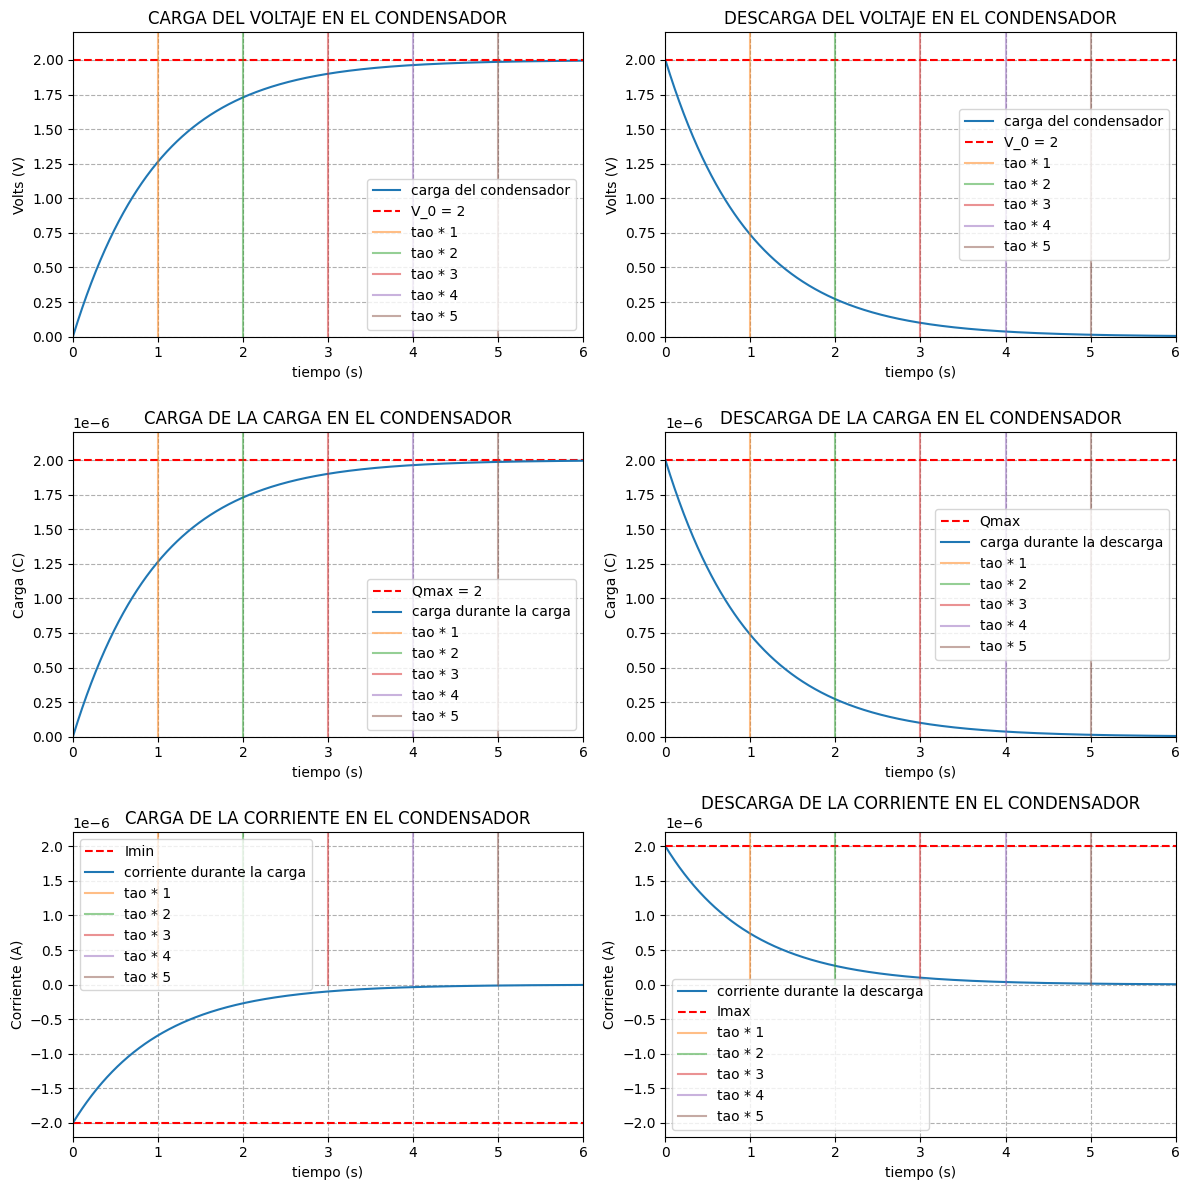

In [ ]:
import numpy as np                          # Importamos la libreria numpy para obtener funciones matemáticas
import matplotlib.pyplot as plt             # Importamos la libreria matplotlib par apoder graficar

# Definición de variables
V_0 = 2
R = 1e6
C = 1e-6
Qmax = C*V_0
Imax = V_0/R

# Creación de arreglos de tiempo
t = np.linspace(0, 6*R*C, 1000)

# Definición de funciones de carga y descarga
Vcarga = V_0 - V_0 * np.exp(-t / (R * C))  # Voltaje durante la carga del condensador
Vdescarga = V_0 * np.exp(-t / (R * C))     # Voltaje durante la descarga del condensador

Qcarga = C * (V_0 - V_0 * np.exp(-t / (R * C)))   # Carga durante la carga del condensador
Qdescarga = C * (V_0 * np.exp(-t / (R * C)))      # Carga durante la descarga del condensador

Icarga = - (C * V_0 / (R * C)) * np.exp(-t / (R * C))   # Corriente durante la carga del condensador
Idescarga = (C * V_0 / (R * C)) * np.exp(-t / (R * C))  # Corriente durante la descarga del condensador

# Creación de arreglos de tao
tao = R * C * np.ones_like(t)

# Creación de la figura y los subplots
fig, axs = plt.subplots(3, 2, figsize=[12, 12])

# Graficación del voltaje del condensador durante su carga y descarga
axs[0, 0].set_title("CARGA DEL VOLTAJE EN EL CONDENSADOR")
axs[0, 0].axis([0, 6 * R * C, 0, V_0 + V_0/10])
axs[0, 0].plot(t, Vcarga, label="carga del condensador")
axs[0, 0].axhline(y=V_0, color="r", label="V_0 = {}".format(V_0), ls="--")
axs[0, 0].grid("on", ls="--")
axs[0, 0].set_xlabel("tiempo (s)")
axs[0, 0].set_ylabel("Volts (V)")
for i in range(1, 6):
    axs[0, 0].plot(tao * i, t, label='tao * {}'.format(i), ls='-',alpha=0.5)
axs[0, 0].legend(loc='lower right')

axs[0, 1].set_title("DESCARGA DEL VOLTAJE EN EL CONDENSADOR")
axs[0, 1].axis([0, 6 * R * C, 0, V_0 + V_0/10])
axs[0, 1].plot(t, Vdescarga, label="carga del condensador")
axs[0, 1].axhline(y=V_0, color="r", label="V_0 = {}".format(V_0), ls="--")
axs[0, 1].grid("on", ls="--")
axs[0, 1].set_xlabel("tiempo (s)")
axs[0, 1].set_ylabel("Volts (V)")
for i in range(1, 6):
    axs[0, 1].plot(tao * i, t, label='tao * {}'.format(i), ls='-',alpha=0.5)
axs[0, 1].legend(loc='center right')

# Graficación de la carga en el circuito durante la carga y descarga del condensador
axs[1, 0].set_title("CARGA DE LA CARGA EN EL CONDENSADOR")
axs[1, 0].axis([0, 6 * R * C, 0, C*V_0 + C*V_0/10])
axs[1, 0].axhline(y=Qmax, color="r", label="Qmax = {}".format(V_0), ls="--")
axs[1, 0].plot(t, Qcarga, label="carga durante la carga")
axs[1, 0].grid("on", ls="--")
axs[1, 0].set_xlabel("tiempo (s)")
axs[1, 0].set_ylabel("Carga (C)")
axs[1, 0].legend(loc='upper right')
for i in range(1, 6):
    axs[1, 0].plot(tao * i, t, label='tao * {}'.format(i), ls='-',alpha=0.5)
axs[1, 0].legend(loc='lower right')

axs[1, 1].set_title("DESCARGA DE LA CARGA EN EL CONDENSADOR")
axs[1, 1].axis([0, 6 * R * C, 0, C*V_0 + C*V_0 /10])
axs[1, 1].axhline(y=Qmax, color="r", label="Qmax", ls="--")
axs[1, 1].plot(t, Qdescarga, label="carga durante la descarga")
axs[1, 1].grid("on", ls="--")
axs[1, 1].set_xlabel("tiempo (s)")
axs[1, 1].set_ylabel("Carga (C)")
axs[1, 1].legend(loc='upper right')
for i in range(1, 6):
    axs[1, 1].plot(tao * i, t, label='tao * {}'.format(i), ls='-',alpha=0.5)
axs[1, 1].legend(loc='best')

# Graficación de la corriente en el circuito durante la carga y descarga del condensador
axs[2, 0].set_title("CARGA DE LA CORRIENTE EN EL CONDENSADOR")
axs[2, 0].axis([0, 6 * R * C, -V_0/R -V_0/(10*R), V_0/R +V_0/(10*R)])
axs[2, 0].axhline(y=-Imax, color="r", label="Imin", ls="--")
axs[2, 0].plot(t, Icarga, label="corriente durante la carga")
axs[2, 0].grid("on", ls="--")
axs[2, 0].set_xlabel("tiempo (s)")
axs[2, 0].set_ylabel("Corriente (A)")
axs[2, 0].legend(loc='upper right')
for i in range(1, 6):
    axs[2, 0].plot(tao * i, t, label='tao * {}'.format(i), ls='-',alpha=0.5)
axs[2, 0].legend(loc='best')

axs[2, 1].set_title("DESCARGA DE LA CORRIENTE EN EL CONDENSADOR")

axs[2, 1].plot(t, Idescarga, label="corriente durante la descarga")
axs[2, 1].axis([0, 6 * R * C, -V_0/R -V_0/(10*R), V_0/R +V_0/(10*R)])
axs[2, 1].axhline(y=Imax, color="r", label="Imax", ls="--")
axs[2, 1].grid("on", ls="--")
axs[2, 1].set_xlabel("tiempo (s)")
axs[2, 1].set_ylabel("Corriente (A)")
axs[2, 1].legend(loc='upper right')
for i in range(1, 6):
    axs[2, 1].plot(tao * i, t, label='tao * {}'.format(i), ls='-',alpha=0.5)
axs[2, 1].legend(loc='best')
plt.tight_layout()  # Ajusta automáticamente el espaciado entre subplots para evitar solapamientos
plt.show()


Ahora quiero encontrar el voltaje del condensador que está en serie con una resistencia, este circuito se llama $RC$ puesto que consta de estos mismos, para poder obtener una gráfica del voltaje del condensador en todo $t$ (continua) necesitaré utilizar métodos numéricos, a continuación, el circuito:

![Circuito, a resolver](https://drive.google.com/uc?id=1niJ0Up_hotQmTmPPCNMxRtj_B_MDZbso)

La relación entre la corriente y la tensión en el condensador es: $$I_C(t) = C\frac{dV_C}{dt} $$

La ley de Kirchhoff de las tensiones establece que la suma de las caídas de voltaje en un circuito cerrado debe ser igual a cero. Aplicando esta ley al circuito $RC$, se obtiene: $$-V_S(t) + V_C(t) + I_C(t)R = 0$$

Donde $V_S(t)$ es la tensión de entrada al circuito y $R$ es la resistencia del resistor en el circuito. Reemplazando $I_C(t)$ por $C\frac{dV_C}{dt}$, se obtiene la ecuación diferencial:
$$-V_S(t) + V_C(t) + RC\frac{dV_C}{dt} = 0$$
Resolviendo esta ecuación para $V_C(t)$, obtengo que: $$\frac{dV_C}{dt} = \frac{V_S(t) - V_C(t)}{RC}$$ Esta es la ecuación diferencial que rige el comportamiento del circuito $RC$. Esta ecuación describe cómo cambia la tensión a través del condensador con respecto al tiempo, en función de la diferencia entre la tensión de entrada y la tensión actual a través del condensador, así como de las propiedades del resistor y el condensador en el circuito.

Ahora aplico métodos numéricos para resolver la ecuación diferencial de primer orden, aplicando método de Euler hacia atrás que dice que una derivada se puede expresar como:
$$\frac{dφ(t)}{dt} = \frac{φ(t)-φ(t-\Delta t)}{\Delta t}$$

entonces reemplazando en la EDO, queda de la siguiente manera:
$$\frac{V_C(t)-V_C(t-1)}{\Delta t} = \frac{V_S(t) - V_C(t)}{RC}$$
Ahora puedo pasar el $\Delta t$ a multiplicar
$$V_C(t)-V_C(t-1) = \frac{V_S(t) - V_C(t)}{RC}\Delta t$$
Ahora despejo $V_C(t)$ y reduzco para obtener una función recurrente:
$$V_C(t) = \frac{\Delta tV_S(t) + RCV_C(t-1)}{RC + \Delta t} $$

note que el voltaje de la resistencia es: $V_S(t) - V_C(t)$

a continuación, la gráfica del circuito RC y así mismo la comparación entre esta y la tomada en el laboratorio.




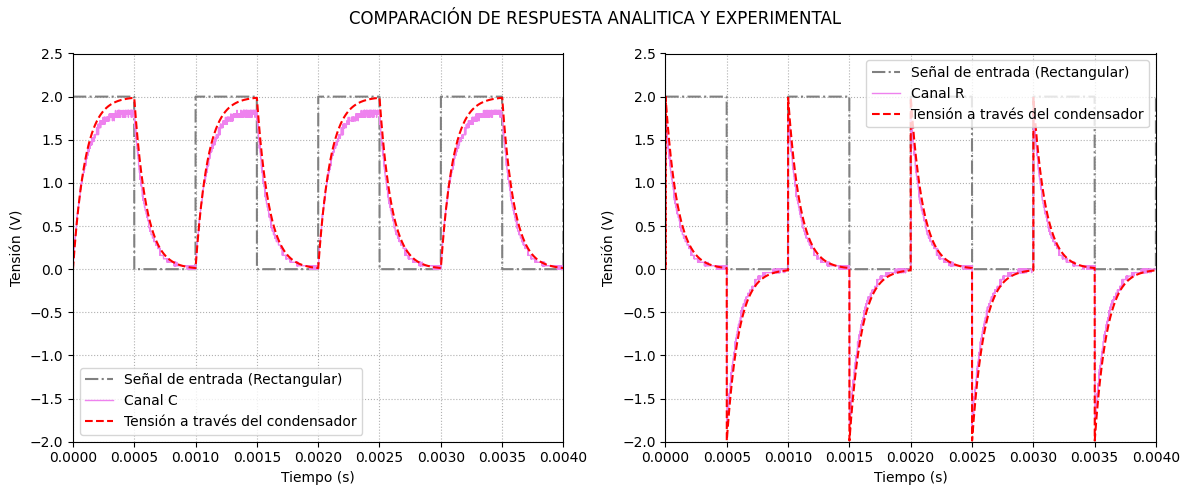

In [ ]:
import numpy as np                                          # Importamos numpy para hacer acercamiento numérico
import matplotlib.pyplot as plt                             # Importamos matplot.pyplot para poder graficar
from scipy.signal import square                             # Importamos scipy para poder obtener una señal cuadrada
import pandas as pd                                         # Importamos pandas para poder usar datos externos

# Cargar datos desde los archivos CSV
ruta_archivo_r = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RC-R.CSV'
ruta_archivo_c = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RC-C.CSV'
datos_r = pd.read_csv(ruta_archivo_r)                       # Cargamos los datos del canal R desde el archivo CSV
datos_c = pd.read_csv(ruta_archivo_c)                       # Cargamos los datos del canal C desde el archivo CSV

dt = 5e-7                                                   # Intervalo de tiempo entre muestras
puntos = 8000                                               # Número total de puntos
t_tot = float(puntos*dt)                                    # Tiempo total de adquisición de datos
min = 25                                                    # Punto de inicio de adquisición de datos
max = puntos + min                                          # Punto final de adquisición de datos

canalr = datos_r['3.0B']                                    # Datos del canal R
desfase1 = 565                                              # Desfase para ajustar la alineación de los datos del canal R
canalr = canalr[min+desfase1:max+desfase1]                  # Seleccionamos el rango de datos del canal R

canalc = datos_c['3.0B']                                    # Datos del canal C
desfase2 = 140                                              # Desfase para ajustar la alineación de los datos del canal C
canalc = canalc[min+desfase2:max + desfase2]                # Seleccionamos el rango de datos del canal C
canalr_numeric = canalr.astype(float)                       # Convertimos los datos del canal R a tipo float
canalc_numeric = canalc.astype(float)                       # Convertimos los datos del canal C a tipo float

R = 1e5                                                     # Resistencia en ohmios
C = 1e-9                                                    # Capacitancia en faradios
tao = R*C                                                   # Constante de tiempo del circuito RC
Vin = 2                                                     # Voltaje de entrada
f = 1000                                                       # Frecuencia de la señal de entrada

# Inicialización de los arrays para las tensiones a través del condensador y la resistencia
V_c = np.zeros(puntos)
V_r = np.zeros(puntos)

# Condiciones iniciales
V_c[0] = 0.0
V_r[0] = Vin

# Creación del vector de tiempo
t = np.linspace(0, t_tot, puntos)

# Fuente de voltaje de entrada
V_i = Vin/2*square(2*np.pi*t*f)+Vin/2

# Cálculo de las tensiones a través del condensador y la resistencia mediante el método de Euler
for i in range(1 , puntos - 1):
    V_c[i + 1] = V_c[i] + dt * (1 / (R * C)) * (V_i[i] - V_c[i])
    V_r[i + 1] = V_i[i] - V_c[i]

# Creación de la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficación de la tensión en el condensador analitica VS experimental.
axs[0].plot(t, V_i, color="gray", label='Señal de entrada (Rectangular)', ls="-.")
axs[0].plot(t, canalc_numeric, label='Canal C', lw=1, color='violet')
axs[0].plot(t, V_c, label='Tensión a través del condensador', color="r", ls = '--')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Tensión (V)')
axs[0].axis([0,t_tot,-Vin,Vin+Vin/4])
axs[0].legend(loc='best')
axs[0].grid(True, ls=':')

# Graficación de la tensión en la resistencia analitica VS experimental.
axs[1].plot(t, V_i, color="gray", label='Señal de entrada (Rectangular)', ls="-.")
axs[1].plot(t, canalr_numeric, label='Canal R', lw=1, color='violet')
axs[1].plot(t, V_r, label='Tensión a través del condensador', color="r",ls = '--')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Tensión (V)')
axs[1].axis([0,t_tot,-Vin,Vin+Vin/4])
axs[1].legend(loc='upper right')
axs[1].grid(True, ls=':')

plt.suptitle('COMPARACIÓN DE RESPUESTA ANALITICA Y EXPERIMENTAL')

plt.tight_layout()
plt.show()

## Circuito RL
Los circuitos RL son una configuración común en electrónica y se utilizan para analizar el comportamiento de los elementos inductivos en un circuito.

Un circuito RL consta de al menos una resistencia (R) y una inductancia (L), donde la resistencia representa la oposición al flujo de corriente y la inductancia representa la capacidad de un elemento para almacenar energía en forma de campo magnético.

Para resolver el circuito RL, se debe tener nociones básicas las cuales nos ayudarán a empezar, siendo que podemos describir el voltaje del inductor de la siguiente manera:
$$\Phi_L = LI_L$$
nótese que se puede derivar, donde la derivada de $\Phi_L$ será el voltaje del inductor.
$$\frac{d\Phi_L}{dt} = L\frac{dI_L}{dt} $$
donde:

*  $ V_L(t) = L \frac{dI_L}{dt}$
* $\Phi_L = LI_L$
* $ V_R = RI_R$
## RL paralelo

Para resolver el RL en paralelo, me basaré en el siguiente circuito:

![Circuito RL en paralelo](https://drive.google.com/uc?id=1hnubNB63G9KlumeTergBcZZE7oDppw8j)

Donde la corriente se reparte en la resistencia y el inductor, por lo tanto, aplicaré LCK:
#### LVK
Usando la única malla, obtenemos la siguiente expresión :
$$ V_R = V_L $$
ahora aplicando la definición de $V_L$, llegamos a:
$$ V_R = L\frac{dI_L}{dt} $$
Despejamos la ecuación diferencial.
$$ \frac{dI_L}{dt} = \frac{1}{L}V_R$$
Utilizando la definición de $V_R$, entonces:
$$ \frac{dI_L}{dt} = \frac{R}{L}I_R$$
Analizando el circuito, se puede notar que $R$ y $L$ están en paralelo; por lo tanto, sus corrientes son opuestas. Esto modifica la EDO de la siguiente manera:
$$ \frac{dI_L}{dt} = -\frac{R}{L}I_L$$
planteo la condición inicial. $I_L(t=0) = I_0$

ahora resolvamos la EDO:

Multiplico a ambos lados de la ecuación por $\frac{dt}{I_L}$.

$$ \frac{1}{I_L}dI_L = - \frac{R}{L}dt$$

Aplico la integral definida desde una corriente inicial $I_0 $ y un tiempo inicial $t_0$ hasta $I_L$ y $t$ respectivamente.

$$ \int_{I_0}^{I_L} \frac{1}{I_L} dI_L= - \int_{t_0}^{t} \frac{R}{L}dt$$

Integro.

$$ \ln{|I|} |_{I_0}^{I_L} = - \frac{R}{L} t|_{t_0}^{t} $$

Aplico los límites y distribuyo la ecuación.

$$ \ln{|I_L|} -\ln{|I_0|} = - \frac{R}{L} ( t - t_0) $$

Aplico propiedades de los logaritmos:

$$ \ln{\frac{|I_L|}{|I_0|}} = - \frac{R}{L} ( t - t_0) $$

Aplico exponencial a ambos lados de la ecuación.

$$ e^{ \ln{\frac{|I_L|}{|I_0|}}} = e^{-\frac{R}{L} ( t - t_0)} $$

Aplico propiedades de logaritmos y exponenciales:

$$ \frac{|I_L|}{|I_0|} = e^{-\frac{R}{L} ( t - t_0)} $$

Despejo la variable $I_L$.

$$ I_L = I_0e^{-\frac{R}{L} ( t - t_0)} $$

Recordemos que la variable $I_L$ es dependiente del tiempo, por lo tanto $ I_L = I_L(t)$.

$$ I_L(t) = I_0e^{-\frac{R}{L} ( t - t_0)} $$

Aplico la condición inicial.

$$ I_L(t=0) \rightarrow I_0e^{-\frac{R}{L} ( 0 - t_0)} = V_0$$
$$ I_L(t=0) \rightarrow e^{-\frac{R}{L} ( 0 - t_0)} = 1$$
Pero para que una exponencial sea $1$, entonces su exponente debe ser cero, pero $R$ no es cero y $L$ no es infinito, por lo tanto, $t_0 = 0$.

Solución de la carga de un inductor.

$$ I_L(t) = I_0e^{-\frac{R}{L}t} $$

## RL serie

Para el RL en serie, aplicaré la función conocida respecto a la corriente del inductor y así mismo obtendré una respuesta forzada. Tomaré como punto de referencia el siguiente circuito:

![Circuito RL en serie](https://drive.google.com/uc?id=11FjM5n_KKpA_jlfnLYmbii8wyBnUfyIT)

Las condiciones para el circuito son:
* $I_L(t=0) = 0$
* $I_L(t → \infty) = I_0$ donde $I_0$ es la fuente de entrada.

Entonces tomo la anterior función de $I_L$ y la apropio a las condiciones:

Uso la anterior ecuación:

$$ I_L(t) = I_0e^{-\frac{R}{L}t} $$

Adapto que $I_L(t=0)=0$


$ I_L(t=0) \rightarrow I_0e^{-\frac{R}{L}t} = 0$

$ V_C(t=0) \rightarrow I_0 = 0$

Esto significa que debo restar $I_0$.

Reescribo la función $I_L$.

$$ I_L(t) = I_0e^{-\frac{R}{L}t} - I_0 $$

Verifico que $I_L(t → \infty) = I_0$.


$ I_L(t \rightarrow \infty) \rightarrow I_0e^{-\frac{R}{L}t} - I_0 = I_0 $

$ V_C(t \rightarrow \infty) \rightarrow I_00 - I_0 = I_0 $

Esto significa que a la función le debo cambiar los signos para que tenga equivalencia.

Reescribo la función $I_L$

$$ I_L(t) = -I_0e^{-\frac{R}{L}t} + I_0 $$

Para reducir un poco más la función, se sabe que $L/R = \tau$, ya que se relaciona con el tiempo, puesto que $\frac{ℍ}{\Omega} = S$.

* Carga $\rightarrow I_L(t) = I_0e^{-\frac{1}{\tau}t} $

* Descarga $\rightarrow I_L(t) = -I_0e^{-\frac{1}{\tau}t} + I_0 $

Utilizaré la programación para aproximar la carga y descarga de un inductor y demostrar que solo se necesitan 5$\tau$ para que el inductor quede cargado o descargado completamente. Además de esto, voy a graficar el flujo magnético y su voltaje, pero antes de esto debo encontrar las expresiones:
* Para encontrar la carga $\Phi_L$ tengo que $\Phi_L = LI_C$ pero ya tengo $I_L$, entonces el flujo magnético queda de la siguiente manera. $ \Phi_L(t) = LI_L(t)$
* Para encontrar el voltaje en el inductor tengo que $V_L = L\frac{dI_L}{dt}$, así que derivo la corriente en el inductor, por lo tanto, la carga y descarga del voltaje se ven de la siguiente manera:

carga $V_L(t) = \frac{-LI_0}{\tau}e^{-\frac{1}{\tau}t} $

descarga $V_L(t) = \frac{LI_0}{\tau}e^{-\frac{1}{\tau}t} $


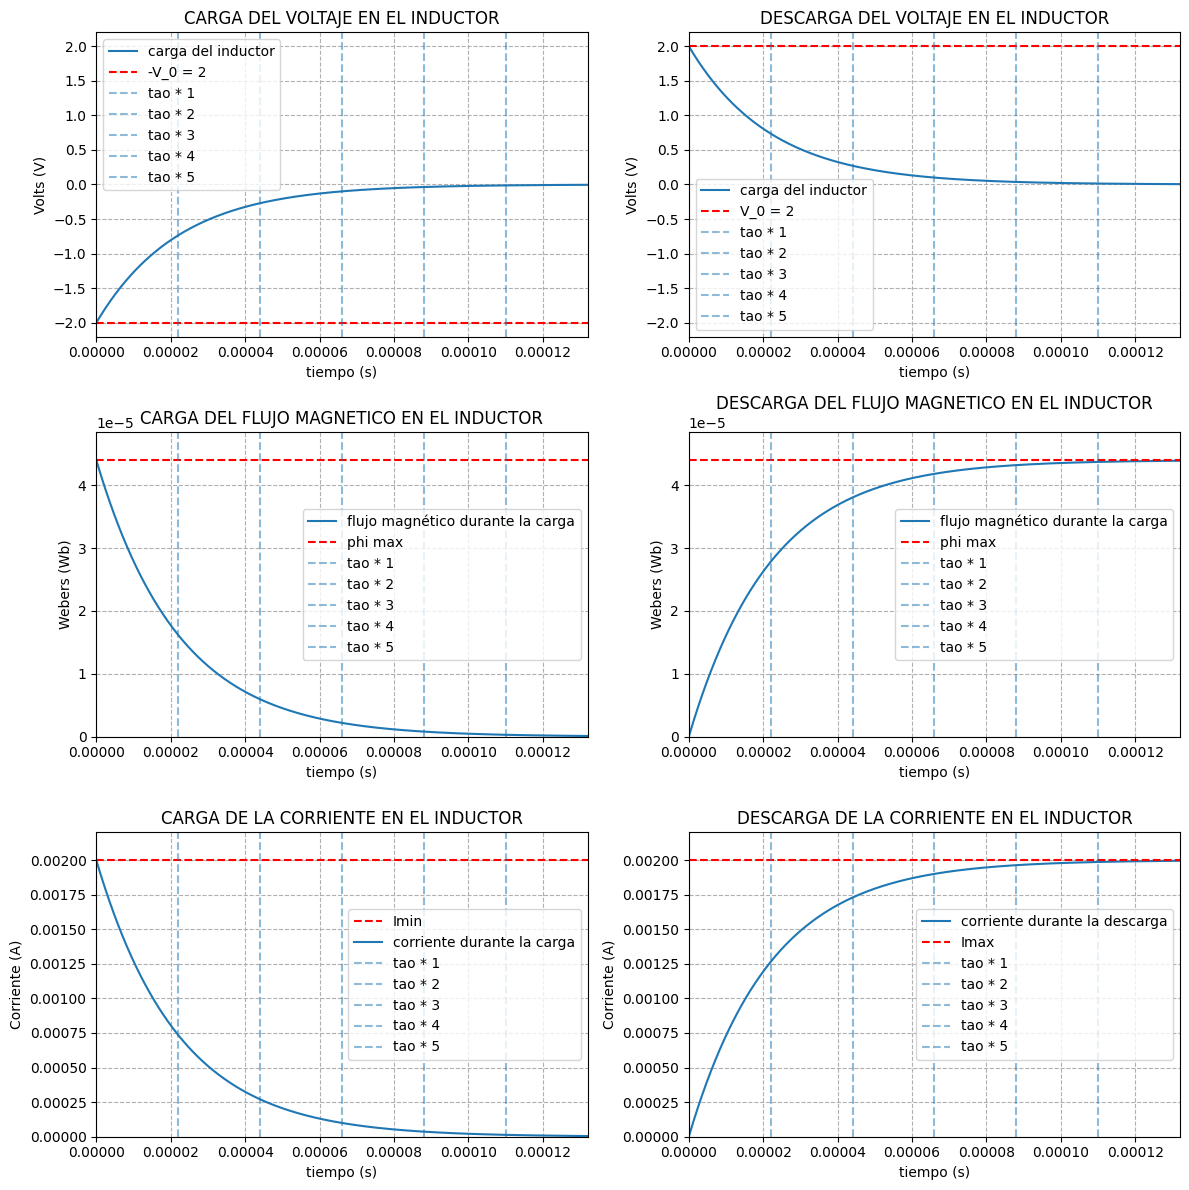

In [ ]:
import numpy as np                          # Importamos la libreria numpy para obtener funciones matemáticas
import matplotlib.pyplot as plt             # Importamos la libreria matplotlib par apoder graficar

# Definición de variables
R = 1e3
L = 22e-3
V_0 = 2

I_0 = V_0/R

# Creación de arreglos de tiempo
t = np.linspace(0, 6*(L/R), 1000)

# Definición de funciones de carga y descarga
Icarga =   I_0 * np.exp(-t / (L/R))         # Corriente durante la carga del inductor
Idescarga = I_0 - I_0 * np.exp(-t / (L/R))  # Corriente durante la descarga del inductor

Vcarga = -L*(I_0/(L/R)) * np.exp(-t / (L/R))   # Voltaje durante la carga del inductor
Vdescarga = L*(I_0/(L/R)) * np.exp(-t / (L/R)) # Voltaje durante la descarga del inductor

fcarga = L*Icarga        # Flujo magnético durante la carga del inductor
fdescarga = L*Idescarga  # Flujo magnético durante la descarga del inductor

# Creación de arreglos de tao
tao = (L/R) * np.ones_like(t)

# Creación de la figura y los subplots
fig, axs = plt.subplots(3, 2, figsize=[12, 12])

# Graficación del voltaje del inductor durante su carga y descarga
axs[0, 0].set_title("CARGA DEL VOLTAJE EN EL INDUCTOR")
axs[0, 0].axis([0, 6 * (L/R), -V_0 - V_0/10, V_0 + V_0/10])
axs[0, 0].plot(t, Vcarga, label="carga del inductor")
axs[0, 0].axhline(y=-V_0, color="r", label="-V_0 = {}".format(V_0), ls="--")
axs[0, 0].grid("on", ls="--")
axs[0, 0].set_xlabel("tiempo (s)")
axs[0, 0].set_ylabel("Volts (V)")
for i in range(1, 6):
    axs[0, 0].axvline(x=tao[i] * i, label='tao * {}'.format(i), linestyle='--', alpha=0.5)
axs[0, 0].legend(loc='upper left')

axs[0, 1].set_title("DESCARGA DEL VOLTAJE EN EL INDUCTOR")
axs[0, 1].axis([0, 6 * (L/R), -V_0 - V_0/10, V_0 + V_0/10])
axs[0, 1].plot(t, Vdescarga, label="carga del inductor")
axs[0, 1].axhline(y=V_0, color="r", label="V_0 = {}".format(V_0), ls="--")
axs[0, 1].grid("on", ls="--")
axs[0, 1].set_xlabel("tiempo (s)")
axs[0, 1].set_ylabel("Volts (V)")
for i in range(1, 6):
    axs[0, 1].axvline(x=tao[i] * i, label='tao * {}'.format(i), linestyle='--', alpha=0.5)
axs[0, 1].legend(loc='lower left')

# Graficación del flujo magnético en el circuito durante la carga y descarga del inductor
axs[1, 0].set_title("CARGA DEL FLUJO MAGNETICO EN EL INDUCTOR")
axs[1, 0].axis([0, 6 * (L/R), 0, L*I_0 + L*I_0/10])
axs[1, 0].plot(t, fcarga, label="flujo magnético durante la carga")
axs[1, 0].axhline(y=L*I_0, color="r", label="phi max", ls="--")
axs[1, 0].grid("on", ls="--")
axs[1, 0].set_xlabel("tiempo (s)")
axs[1, 0].set_ylabel("Webers (Wb)")
for i in range(1, 6):
    axs[1, 0].axvline(x=tao[i] * i, label='tao * {}'.format(i), linestyle='--', alpha=0.5)
axs[1, 0].legend(loc='center right')

axs[1, 1].set_title("DESCARGA DEL FLUJO MAGNETICO EN EL INDUCTOR")
axs[1, 1].axis([0, 6 * (L/R), 0, L*I_0 + L*I_0/10])
axs[1, 1].plot(t, fdescarga, label="flujo magnético durante la carga")
axs[1, 1].axhline(y=L*I_0, color="r", label="phi max", ls="--")
axs[1, 1].grid("on", ls="--")
axs[1, 1].set_xlabel("tiempo (s)")
axs[1, 1].set_ylabel("Webers (Wb)")
for i in range(1, 6):
    axs[1, 1].axvline(x=tao[i] * i, label='tao * {}'.format(i), linestyle='--', alpha=0.5)
axs[1, 1].legend(loc='center right')

# Graficación de la corriente en el circuito durante la carga y descarga del inductor
axs[2, 0].set_title("CARGA DE LA CORRIENTE EN EL INDUCTOR")
axs[2, 0].axis([0, 6 * (L/R), 0, I_0 +I_0/10])
axs[2, 0].axhline(y=I_0, color="r", label="Imin", ls="--")
axs[2, 0].plot(t, Icarga, label="corriente durante la carga")
axs[2, 0].grid("on", ls="--")
axs[2, 0].set_xlabel("tiempo (s)")
axs[2, 0].set_ylabel("Corriente (A)")
for i in range(1, 6):
    axs[2, 0].axvline(x=tao[i] * i, label='tao * {}'.format(i), linestyle='--', alpha=0.5)
axs[2, 0].legend(loc='center right')

axs[2, 1].set_title("DESCARGA DE LA CORRIENTE EN EL INDUCTOR")
axs[2, 1].plot(t, Idescarga, label="corriente durante la descarga")
axs[2, 1].axis([0, 6 * (L/R), 0, I_0 +I_0/10])
axs[2, 1].axhline(y=I_0, color="r", label="Imax", ls="--")
axs[2, 1].grid("on", ls="--")
axs[2, 1].set_xlabel("tiempo (s)")
axs[2, 1].set_ylabel("Corriente (A)")
for i in range(1,6):
    axs[2, 1].axvline(x=tao[i] * i, label='tao * {}'.format(i), linestyle='--', alpha=0.5)
axs[2, 1].legend(loc='center right')

plt.tight_layout()  # Ajusta automáticamente el espaciado entre subplots para evitar solapamientos
plt.show()

Ahora la corriente del Inductor en serie de una resistencia, este circuito se llama  RL  puesto que consta de estos mismos, para poder obtener una grafica de la corriente en todo  t  (continua) necesitaremos un poco de trabajo con ecuaciones diferenciales y metodos numéricos para poder graficar de manera aproximada, a continuación el circuito:

![Circuito a resolver](https://drive.google.com/uc?id=1UbRffV-1PdIBznT78Omd-mBljjkp5jqS)

La relación entre la corriente y la tensión en el inductor es: $$V_L(t) = L\frac{dI_L}{dt}$$

Aplicando la ley de voltaje de Kirchhoff al circuito RL, obtenemos: $$V_S(t) - V_L(t) - RI_L(t) = 0$$

Reemplazando $V_L(t)$ por $L\frac{dI_L}{dt}$, obtenemos la ecuación diferencial: $$V_S(t) - L * (dI_L/dt) - RI_L(t) = 0$$

Simplificando, llegamos a: $$V_S(t) - RI_L(t) = L\frac{dI_L}{dt}$$

Dividiendo ambos lados de la ecuación por L para aislar $(dI_L/dt)$, obtenemos: $$(V_S(t) - RI_L(t)) / L = (\frac{dI_L}{dt})$$

Entonces, la ecuación diferencial resultante es: $$(\frac{dI_L}{dt}) = \frac{V_S(t) - RI_L(t)}{L}$$

Esta ecuación describe cómo cambia la corriente a través del inductor con respecto al tiempo, en función de la diferencia entre la corriente de entrada y la corriente actual a través del inductor, así como de las propiedades del resistor y el inductor en el circuito.

Ahora aplicaremos metodos numerticos para resolver la ecuación diferencial de primer orden, aplicando metodo de euler hacia adelante que dice que una derivada se puede expresar como:
$$\frac{dφ(t)}{dt} = \frac{φ(t+1)-φ(t)}{\Delta t}$$

entonces reemplazando en la EDO, queda de la siguiente manera:
$$\frac{I_L(t+1)-I_L(t)}{\Delta t} = \frac{V_S(t) - I_L(t)}{L}$$
Ahora podemos pasar el $\Delta t$ a multiplicar
$$I_L(t+1)-I_L(t) = \frac{V_S(t) - I_L(t)}{L}\Delta t$$
Ahora despejamos $I_L(t+1)$ y reducimos para obtener una función recurrente:
$$I_L(t+1) = \frac{\Delta tV_S(t)}{L} + I_L(t)( 1 + \frac{\Delta tR}{L}) $$


note que el voltaje de la resistencia es: $I_L(t)*R$ y el voltaje del inductor es $V_S(t)-V_R(t) = V_L(t)$

a continuación la grafica de nuestro circuito RL y asi mismo la comparación entre esta y la tomada en el laboratorio.

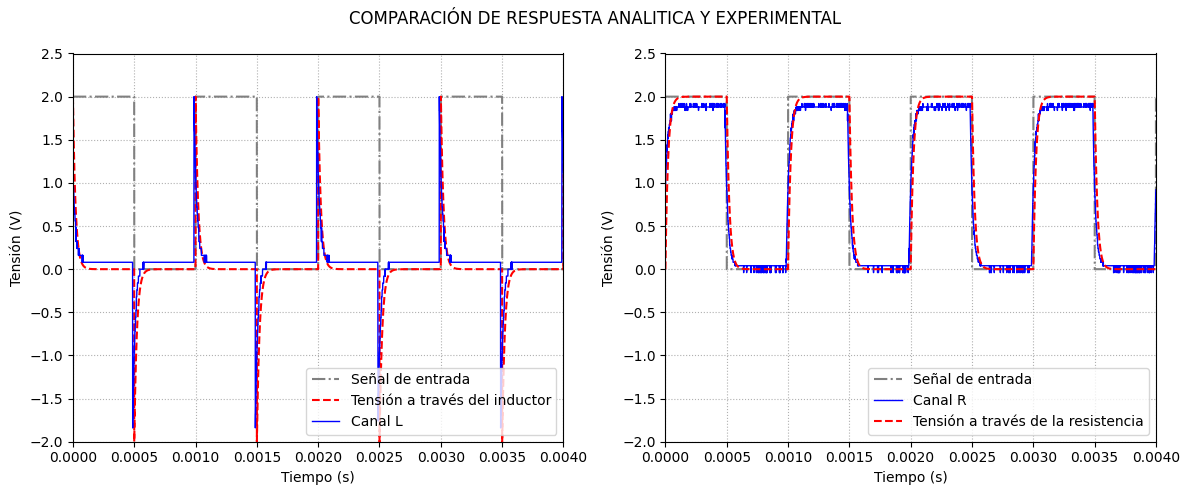

In [ ]:
import numpy as np                                          # Importamos numpy para hacer acercamiento numérico
import matplotlib.pyplot as plt                             # Importamos matplot.pyplot para poder graficar
from scipy.signal import square                             # Importamos scipy para poder obtener una señal cuadrada
import pandas as pd                                         # Importamos pandas para poder usar datos externos

# Cargar datos desde los archivos CSV
ruta_archivo_r = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RL-R.CSV'
ruta_archivo_l = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RL-L.CSV'
datos_r = pd.read_csv(ruta_archivo_r)                       # Cargamos los datos del canal R desde el archivo CSV
datos_l = pd.read_csv(ruta_archivo_l)                       # Cargamos los datos del canal L desde el archivo CSV

dt = 5e-7                                                   # Intervalo de tiempo entre muestras
puntos = 8000                                               # Número total de puntos
t_tot = float(puntos*dt)                                    # Tiempo total de adquisición de datos
min = 25                                                    # Punto de inicio de adquisición de datos
max = puntos + min                                          # Punto final de adquisición de datos

canalr = datos_r['3.0B']                                    # Datos del canal R
desfase1 = 510                                              # Desfase para ajustar la alineación de los datos del canal R
canalr = canalr[min+desfase1:max+desfase1]                  # Seleccionamos el rango de datos del canal R

canall = datos_l['3.0B']                                    # Datos del canal L
desfase2 = 440                                              # Desfase para ajustar la alineación de los datos del canal L
canall = canall[min+desfase2:max + desfase2]                # Seleccionamos el rango de datos del canal L

canalr_numeric = canalr.astype(float)                       # Convertimos los datos del canal R a tipo float
canall_numeric = canall.astype(float)                       # Convertimos los datos del canal L a tipo float

R = 1e3                                                 # Resistencia en ohmios
L = 22e-3                                               # Capacitancia en Henrios
tao = L/R                                               # Constante de tiempo del circuito RL
Vin = 2                                                 # Voltaje de entrada
f = 1000                                                # Frecuencia de la señal de entrada

# Condiciones iniciales
I_L = np.zeros(puntos)
I_L[0] = 0.0

# Creación del vector de tiempo
t = np.linspace(0, t_tot, puntos)

# Fuente de voltaje de entrada
V_i = Vin/2*square(2*np.pi*t*f)+Vin/2

# Cálculo de las tensiones a través del inductor y la resistencia mediante el método de Euler
for i in range(0, puntos - 1):
  I_L[i+1] = dt*V_i[i]/L + I_L[i]*(1- R*dt/L)
V_r = I_L*R
V_L = V_i-V_r

# Creación de la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficación de la tensión en el inductor analitica VS experimental.
axs[0].plot(t, V_i, color="gray", label='Señal de entrada', ls="-.")
axs[0].plot(t, V_L, label='Tensión a través del inductor', color="r", ls = '--')
axs[0].plot(t, canall_numeric, label='Canal L', lw=1, color='b')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Tensión (V)')
axs[0].axis([0,t_tot,-Vin,Vin+Vin/4])
axs[0].legend(loc='best')
axs[0].grid(True, ls=':')

# Graficación de la tensión en la resistencia analitica VS experimental.
axs[1].plot(t, V_i, color="gray", label='Señal de entrada', ls="-.")
axs[1].plot(t, canalr_numeric, label='Canal R', lw=1, color='b')
axs[1].plot(t, V_r, label='Tensión a través de la resistencia', color="r",ls = '--')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Tensión (V)')
axs[1].axis([0,t_tot,-Vin,Vin+Vin/4])
axs[1].legend(loc='lower right')
axs[1].grid(True, ls=':')

plt.suptitle('COMPARACIÓN DE RESPUESTA ANALITICA Y EXPERIMENTAL')

plt.tight_layout()
plt.show()

# CIRCUITO LC

### Dado un circuito LC en serie
condición inicial $V(t=0) = 0$
condición inicial $I(t=0) = i_0$
tendremos que:
$$ V_L \neq V_C  $$
y que:
$$ i_L = i_C$$
por lo tanto podremos juntar ambas ecuaciones y los saberes previos, de manera en la que tendremos una expresión más simplificada:
$$ V_0 = V_L + V_C $$
donde:
$$ L\frac{di}{dt} =  -\frac{1}{C}\int_{i_0}^{i(t)}i dt $$
derivamos:
$$ L\frac{d^2i}{dt^2} = -\frac{i(t)}{C}$$
arreglamos un poco:
$$ \frac{1}{i(t)}\frac{d^2i}{dt^2} = -\frac{1}{L*C}$$
Esta ecuación diferencial de segundo orden, la asumiremos con una respuesta seno, la cual en terminos de la corriente nso queda asi:
$$ I(t) = i_0\sin{(w_ot)}$$
donde $w_o = \frac{1}{\sqrt{LC}}$

### Dado un circuito LC en paralelo
tendremos que:
$$ i_L \neq i_C  $$
y que:
$$ V_L = V_C$$
por lo tanto podremos juntar ambas ecuaciones y los saberes previos, de manera en la que tendremos una expresión más simplificada:
$$ i_0 = i_L + i_C $$
donde:
$$ C\frac{dv}{dt} =  -\frac{1}{L}\int_{v_0}^{v(t)}v dt $$
derivamos:
$$ C\frac{d^2v}{dt^2} = -\frac{v(t)}{L}$$
arreglamos un poco:
$$ \frac{1}{v(t)}\frac{d^2i}{dt^2} = -\frac{1}{L*C}$$
Esta ecuación diferencial de segundo orden, la asumiremos con una respuesta seno, la cual en terminos de la corriente nso queda asi:
$$ V(t) = V_0\cos{(w_ot)}$$
donde $w_o = \frac{1}{\sqrt{LC}}$
ahora grafiquemos:

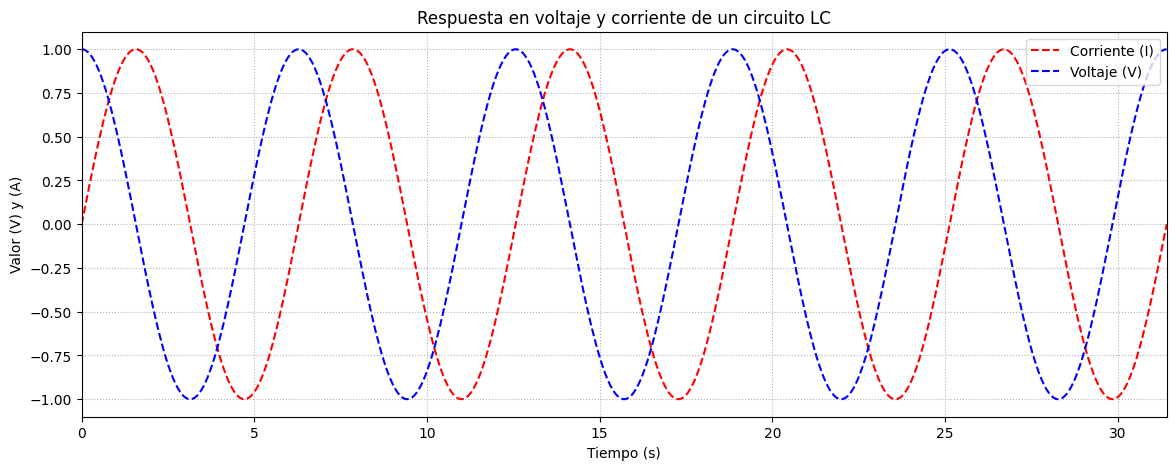

In [ ]:
import numpy as np                          # Importamos la libreria numpy para obtener funciones matemáticas
import matplotlib.pyplot as plt             # Importamos la libreria matplotlib par apoder graficar
L = 1                                       # Inductancia en Henry (H)
C = 1                                       # Capacitancia en Faradios (F)
V_0 = 1                                     # Voltaje incial
i_0 = 1                                     # Corriente inicial
w_0 = 1/np.sqrt(L*C)                        # Omega, sale de la solución de la EDO
tao = np.sqrt(L*C)
def V(t): return V_0*np.cos(w_0*t)          # Definimos el voltaje
def I(t): return i_0*np.sin(w_0*t)          # Definimos la corriente

plt.figure(1 , figsize = ([14 , 5]))        # Graficamos
plt.axis([0 , 10*np.pi , -V_0-V_0/10 , V_0+V_0/10])
t = np.linspace(0 , 10*np.pi , 500)
plt.plot(t, I(t), 'r', label='Corriente (I)', ls = "--")
plt.plot(t, V(t), 'b', label='Voltaje (V)', ls = "--")
plt.title('Respuesta en voltaje y corriente de un circuito LC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor (V) y (A)')
plt.legend()
plt.grid(True, ls=":")
plt.show()


# Conclusiones

Estas conclusiones se basan en los objetivos establecidos previamente y destacan las principales observaciones y aprendizajes derivados del análisis y la comparación de los datos obtenidos mediante simulaciones numéricas, análisis analítico y experimentación práctica. A través de esta introducción, se presenta un panorama general de las conclusiones que serán detalladas a continuación, proporcionando una visión concisa pero informativa del trabajo realizado y los resultados obtenidos en el laboratorio.


1. Comportamiento transitorio de circuitos RL y RC: Se observó que tanto en los circuitos RL como en los RC, el comportamiento transitorio al conectar o desconectar un generador de señales pudo ser comprendido mediante simulaciones numéricas en Google Colab. Los resultados obtenidos permitieron analizar cómo varían las corrientes y las diferencias de potencial en función del tiempo durante el proceso de carga y descarga.

2. Verificación de tiempos de carga y descarga: Se demostró que los tiempos necesarios para que los circuitos alcancen el régimen estacionario de corrientes y diferencias de potencial después de la conexión o desconexión del generador pueden ser verificados y comparados utilizando métodos de análisis numérico en Google Colab. Esta verificación es crucial para comprender el comportamiento del circuito en situaciones prácticas y para garantizar su correcto funcionamiento.

3. Familiarización con herramientas de análisis: Se logró el objetivo de familiarizarse con la implementación de métodos numéricos en Google Colab para resolver circuitos de manera computacional y graficar resultados. Esta habilidad es fundamental para realizar análisis más avanzados en el futuro y para utilizar herramientas computacionales en la resolución de problemas de ingeniería eléctrica.

4. Comparación de resultados: Se contrastaron los resultados obtenidos mediante análisis numérico en Google Colab con los obtenidos de manera analítica y experimental. Esta comparación permitió validar la precisión y la consistencia entre estos tres métodos de análisis, lo que brinda confianza en la utilización de simulaciones numéricas como una herramienta complementaria y confiable en el estudio de circuitos eléctricos.

En resumen, el laboratorio proporcionó una experiencia integral en la comprensión, análisis y verificación de circuitos de primer orden RL y RC, así como en el uso de herramientas computacionales para resolver problemas de ingeniería eléctrica. Los resultados obtenidos contribuyen al desarrollo de habilidades prácticas y teóricas en el ámbito de la electrónica.


# Laboratorio 2

En este informe, se discutirá el estudio de la respuesta transitoria de circuitos RLC (Resistencia, Inductancia y Capacitancia) de segundo orden en configuraciones en paralelo y en serie. En particular, se examinará el comportamiento del circuito al conectar o desconectar el generador de señales, centrándose en la respuesta general del sistema, incluidos los fenómenos de sobreamortiguación y subamortiguación. También se intentará obtener la respuesta completa por métodos numéricos y/o variables de estado.

**Objetivos:**

1. El objetivo principal de esta práctica es analizar en profundidad la respuesta transitoria de circuitos RLC de segundo orden.

2. Comprender y aplicar los principios básicos de la teoría de circuitos para resolver analíticamente la respuesta de estos sistemas ante cambios de excitación.

3. Explorar y caracterizar las respuestas especialmente en casos de sobreamortiguación y subamortiguación, mediante la manipulación de parámetros del circuito.

4. Investigar y evaluar el impacto de la frecuencia de excitación en la respuesta transitoria de los circuitos RLC de segundo orden.

5. Analizar la influencia de la variación de la resistencia, inductancia y capacitancia en la respuesta transitoria del circuito, identificando cómo afectan a la estabilidad y comportamiento del sistema.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import scipy.linalg as scl
from scipy.signal import square

# Circuito RLC en serie.

Para el análisis en serie se utilizará como base el siguiente circuito:

![RLC serie](https://drive.google.com/uc?id=1g557DBuRs6CoPk-nevPltwL36jVUZyUh)

Piden la corriente del sistema y el voltaje del condensador, por lo tanto, buscaré dos expresiones de este tipo para poder encontrar las ecuaciones características y usar variables de estado, donde buscaré satisfacer que:
$$ \dot{𝕏} = A𝕏 + B𝕌 $$
Donde $𝕏$ son las variables que necesitamos, $\dot{𝕏}$ sus derivadas, $𝕌$ son las entradas de nuestro sistema, $B$ son las relaciones de entrada del sistema y $A$ son las relaciones de las variables al sistema.

De esta manera necesito encontrar dos ecuaciones, las cuales dependan de $I_L$ y $V_C$ para poder establecer la ecuación matricial y luego solucionarlo mediante métodos numéricos.

### Por LVK
Al ser un circuito en serie, tendremos que:
$$ V(t) = V_R(t) + V_L(t) + V_C(t)$$
Pero $V_L(t) = L\frac{dI_L}{dt}$, entonces lo reemplazo.
$$ V(t) = V_R(t) + L\frac{dI_L}{dt} + V_C(t)$$
Pero $V_R(t) = RI_L$, entonces lo reemplazo.
$$ V(t) = RI_L + L\frac{dI_L}{dt} + V_C(t)$$
Ahora, para evitar la mucha notación, tomaré las variables derivadas con un punto arriba como en física, además de las funciones dependientes del tiempo, solo las dejaré como variables para no saturar, entonces tengo lo siguiente.
$$ V = RI_L + L\dot{I_L} + V_C$$
Despejo $I_L$.
$$ \dot{I_L} = \frac{V - V_C - RI_L}{L}$$
Por último, distribuyo.
$$ \dot{I_L} = \frac{V}{L}-\frac{V_C}{L}-\frac{RI_L}{L}$$
La primera ecuación que tengo representa la corriente del circuito, por lo tanto, ya tenemos una fila completa.
1.	$ \dot{I_L} = \frac{1}{L}V -\frac{1}{L}V_C-\frac{R}{L}I_L$.

### Por LCK

Tomaré como nodo la unión entre la resistencia y el inductor, donde extraemos la siguiente ecuación.
$$I_L - I_C = 0 $$
Pero $I_C = C\frac{dV_C}{dt}$, entonces lo reemplazo.
$$I_L - C\frac{dV_C}{dt} = 0$$
Ahora reemplazo la notación.
$$I_L - C\dot{V_C} = 0$$
Despejo la variable que necesito.
$$ \dot{V_C} = \frac{I_L}{C}$$
La segunda ecuación que tengo representa el voltaje del condensador; por lo tanto, ya tenemos una fila completa.
2.	$ \dot{V_C} = \frac{1}{C}I_L$

Ahora debo acomodarlas en matrices.

$ \dot{𝕏} = \begin{bmatrix} \dot{I_L} \\ \dot{V_C} \end{bmatrix}$
$$ $$
$ 𝕏 = \begin{bmatrix} I_L \\ V_C \end{bmatrix}$
$$ $$
$ A = \begin{bmatrix} -\frac{R}{L} & -\frac{1}{L} \\ \frac{1}{C} & 0 \end{bmatrix}$
$$ $$
$ B = \begin{bmatrix}  \frac{1}{L} \\ 0  \end{bmatrix}$
$$ $$
$ 𝕌 = \begin{bmatrix} V \end{bmatrix} $

Si utilizamos Euler hacia adelante, podemos simplificar a una ecuación recurrente.

$$ \frac{𝕏_{i+1}-𝕏_{i}}{\Delta t} = A𝕏_{i} + B𝕌 $$
Pasamos a multiplicar el $\Delta t$.
$$ 𝕏_{i+1}-𝕏_{i} = A𝕏_{i}\Delta t + B𝕌\Delta t $$
Despejamos el vector siguiente.
$$ 𝕏_{i+1} = A𝕏_{i}\Delta t + B𝕌\Delta t + 𝕏_{i}$$
Reducimos.
$$ 𝕏_{i+1} = 𝕏_{i}(A\Delta t + 𝕀) + B𝕌\Delta t $$
donde $𝕀 = identidad(n)$.

Ahora graficaré en el siguiente código la comparación entre lo experimental y lo analítico hecho aquí.



2345.207879911715


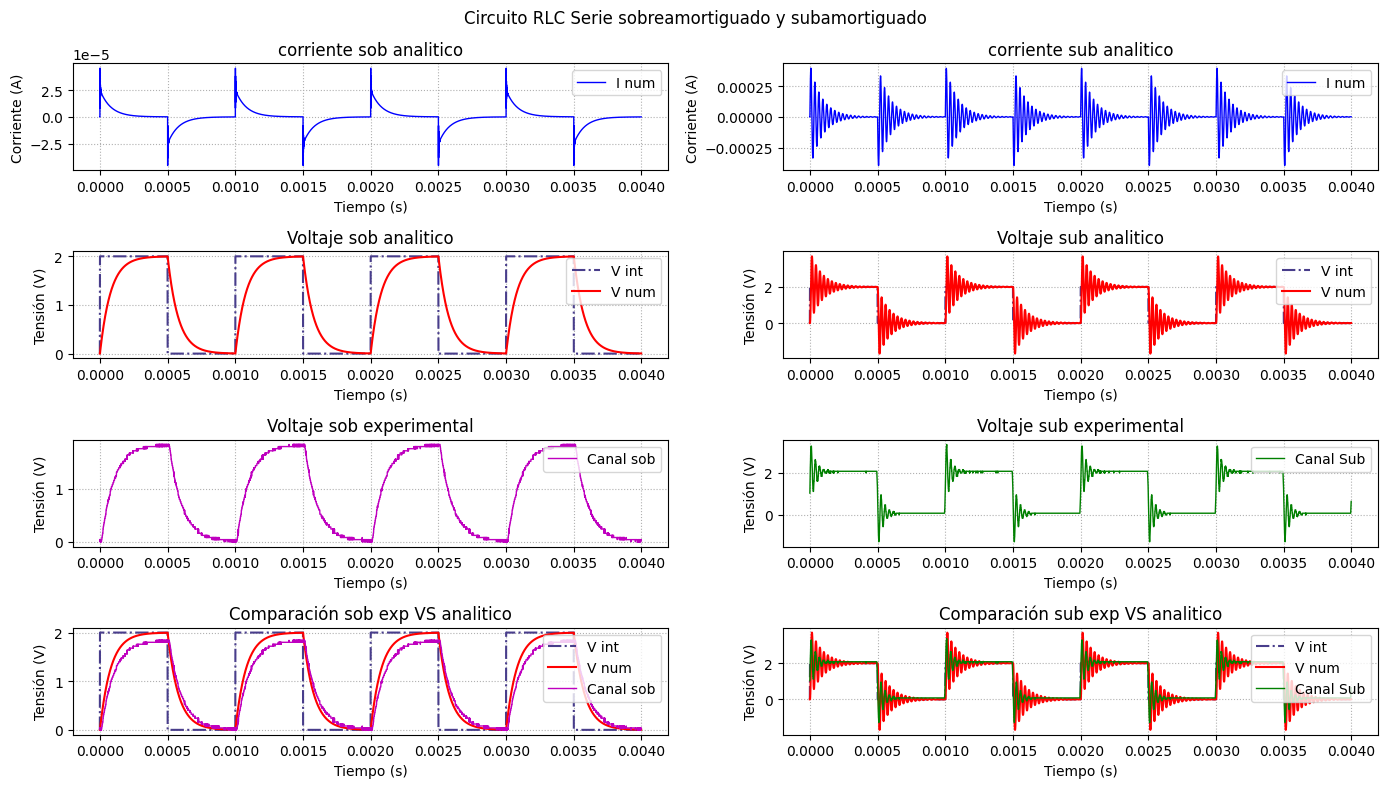

In [ ]:
import numpy as np                                          # Importamos numpy para hacer acercamiento numérico
import matplotlib.pyplot as plt                             # Importamos matplot.pyplot para poder graficar
from scipy.signal import square                             # Importamos scipy para poder obtener una señal cuadrada
import pandas as pd                                         # Importamos pandas para poder usar datos externos

# Cargar datos desde el archivo CSV
ruta_archivo_sub = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RLCS-sub.CSV'
ruta_archivo_sob = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RLCS-sob.CSV'
datos_sub = pd.read_csv(ruta_archivo_sub)                       # Cargamos los datos del canal sub desde el archivo CSV
datos_sob = pd.read_csv(ruta_archivo_sob)                       # Cargamos los datos del canal sob desde el archivo CSV

dt = 5e-7                                                   # Intervalo de tiempo entre muestras
puntos = 8000                                               # Número total de puntos
puntos = puntos -1
t_tot = float(puntos*dt)                                    # Tiempo total de adquisición de datos
min = 25                                                    # Punto de inicio de adquisición de datos
max = puntos + min                                          # Punto final de adquisición de datos

canalsub = datos_sub['2.0B']                                # Datos del canal sub
desfase1 = 468                                              # Desfase para ajustar la alineación de los datos del canal sub
canalsub = canalsub[min+desfase1:max+desfase1]              # Seleccionamos el rango de datos del canal sub

canalsob = datos_sob['3.0B']                                # Datos del canal sob
desfase2 = 840                                              # Desfase para ajustar la alineación de los datos del canal sob
canalsob = canalsob[min+desfase2:max+desfase2]              # Seleccionamos el rango de datos del canal sob

canalsub_numeric = canalsub.astype(float)                   # Convertimos los datos del canal sub a tipo float
canalsob_numeric = canalsob.astype(float)                   # Convertimos los datos del canal sob a tipo float

R = 1000                                                     # Resistencia en ohmios
R_1 = 80e3                                                  # Resistencia en ohmios
C = 1e-9                                                    # Condensador en Faradios
L = 22e-3                                                   # Inductor en Henrios
R_critico = np.sqrt(L*C)/(2*C)                              # Resistencia critica
wn = 1 / np.sqrt(L * C)                                     # Frecuencia del circuito
T = 2 * np.pi / wn                                          # Periodo del circuito
Vin = 2                                                     # Voltaje de entrada
f = 1000
t = np.arange(0, t_tot, dt)

V_i = Vin/2 * square(2*np.pi*f*(t-dt)) + Vin/2

A = np.array([[-R/L, -1/L], [1/C, 0]])
A_1 = np.array([[-R_1/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])
I = np.identity(np.shape(A)[0])

x = np.zeros((2, puntos))   # Solución
x_1 = np.zeros((2, puntos))   # Solución

for n in range(puntos - 1):
    x[:, n + 1] = np.dot((dt * A + I), x[:, n]) + dt * B.flatten() * V_i[n]

for n in range(puntos - 1):
    x_1[:, n + 1] = np.dot((dt * A_1 + I), x_1[:, n]) + dt * B.flatten() * V_i[n]

print(R_critico)

fig, axs = plt.subplots(4, 2, figsize=(14, 8))

axs[0, 0].set_title('corriente sob analitico')
axs[0, 0].plot(t, x_1[0, :], 'b',label='I num', lw = 1)
axs[0, 0].legend(loc='best')
axs[0, 0].set_xlabel('Tiempo (s)')
axs[0, 0].set_ylabel('Corriente (A)')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True, ls=':')

axs[0, 1].set_title('corriente sub analitico')
axs[0, 1].plot(t, x[0, :], 'b',label='I num', lw = 1)
axs[0, 1].legend(loc='best')
axs[0, 1].set_xlabel('Tiempo (s)')
axs[0, 1].set_ylabel('Corriente (A)')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True, ls=':')

axs[1, 1].set_title('Voltaje sub analitico')
axs[1, 1].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[1, 1].plot(t, x[1, :], 'r',label='V num')
axs[1, 1].legend(loc='best')
axs[1, 1].set_xlabel('Tiempo (s)')
axs[1, 1].set_ylabel('Tensión (V)')
axs[1, 1].legend(loc='upper right')
axs[1, 1].grid(True, ls=':')

axs[1, 0].set_title('Voltaje sob analitico')
axs[1, 0].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[1, 0].plot(t, x_1[1, :], 'r',label='V num')
axs[1, 0].legend(loc='best')
axs[1, 0].set_xlabel('Tiempo (s)')
axs[1, 0].set_ylabel('Tensión (V)')
axs[1, 0].legend(loc='upper right')
axs[1, 0].grid(True, ls=':')

axs[2, 0].set_title('Voltaje sob experimental')
axs[2, 0].plot(t, canalsob_numeric, label='Canal sob', lw=1, color='m')
axs[2, 0].set_xlabel('Tiempo (s)')
axs[2, 0].set_ylabel('Tensión (V)')
axs[2, 0].legend(loc='upper right')
axs[2, 0].grid(True, ls=':')

axs[2, 1].set_title('Voltaje sub experimental')
axs[2, 1].plot(t, canalsub_numeric, label='Canal Sub', lw=1, color='g')
axs[2, 1].set_xlabel('Tiempo (s)')
axs[2, 1].set_ylabel('Tensión (V)')
axs[2, 1].legend(loc='upper right')
axs[2, 1].grid(True, ls=':')

axs[3, 0].set_title('Comparación sob exp VS analitico')
axs[3, 0].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[3, 0].plot(t, x_1[1, :], 'r',label='V num')
axs[3, 0].plot(t, canalsob_numeric, label='Canal sob', lw=1, color='m')
axs[3, 0].set_xlabel('Tiempo (s)')
axs[3, 0].set_ylabel('Tensión (V)')
axs[3, 0].legend(loc='upper right')
axs[3, 0].grid(True, ls=':')

axs[3, 1].set_title('Comparación sub exp VS analitico')
axs[3, 1].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[3, 1].plot(t, x[1, :], 'r', label='V num')
axs[3, 1].plot(t, canalsub_numeric, label='Canal Sub', lw=1, color='g')
axs[3, 1].set_xlabel('Tiempo (s)')
axs[3, 1].set_ylabel('Tensión (V)')
axs[3, 1].legend(loc='upper right')
axs[3, 1].grid(True, ls=':')

plt.suptitle('Circuito RLC Serie sobreamortiguado y subamortiguado')

plt.tight_layout()
plt.show()

# Circuito RLC paralelo.

Para el análisis en serie se utilizará como base el siguiente circuito:

![RLC paralelo](https://drive.google.com/uc?id=1QMDgxsQlFBtfUWvR2KkQdQOWcgfGZYO0)

Entonces, como en el anterior ejercicio de RLC serie, piden la corriente del sistema y el voltaje del condensador; por lo tanto, usaré variables de estado y Euler hacia adelante para solucionarlo.

Buscaré dos ecuaciones, las cuales dependan de $I_L$ y $V_C$ para poder establecer la ecuación matricial y luego solucionarlo mediante métodos numéricos.

### Por LVK
Por lo tanto, la LVK se describe de la siguiente manera.
$$ -V + V_L + V_C = 0$$
Pero $V_L(t) = L\frac{dI_L}{dt}$, entonces reemplazo.
$$ -V + L\frac{dI_L}{dt} + V_C = 0$$
Ahora despejo $\frac{dI_L}{dt}$.
$$  \frac{dI_L}{dt} = \frac{V}{L} - \frac{V_C}{L}$$
por último, reescribo en términos de variables de estado.
$$  \dot{I_L} = \frac{V}{L} - \frac{V_C}{L}$$
La primera ecuación que tengo representa la corriente del circuito, por lo tanto, ya tengo una fila completa.
1.	$  \dot{I_L} = \frac{1}{L}V - \frac{1}{L}V_C$.

### Por LCK

Analizaré el nodo en el cual se une el condensador, el inductor y la resistencia, quedando la ecuación de la siguiente manera.
$$ I_L - \frac{V_C}{R} -I_C = 0$$
Pero $I_C = C\frac{dV_C}{dt}$, entonces reemplazo.
$$ I_L - \frac{V_C}{R} -C\frac{dV_C}{dt} = 0$$
Ahora reemplazo la notación.
$$ I_L - \frac{V_C}{R} -C\dot{V_C} = 0$$
Despejo mi variable.
$$   \dot{V_C} = \frac{I_L}{C} - \frac{V_C}{RC}$$
La segunda ecuación que tengo representa el voltaje del condensador, por lo tanto, ya tenemos una fila completa.
2.	$   \dot{V_C} = \frac{1}{C}I_L - \frac{1}{RC}V_C$

Ahora debo acomodarlas en matrices.

$ \dot{𝕏} = \begin{bmatrix} \dot{I_L} \\ \dot{V_C} \end{bmatrix}$
$$ $$
$ 𝕏 = \begin{bmatrix} I_L \\ V_C \end{bmatrix}$
$$ $$
$ A = \begin{bmatrix} 0 & -\frac{1}{L} \\ \frac{1}{C} & -\frac{1}{RC} \end{bmatrix}$
$$ $$
$ B = \begin{bmatrix}  \frac{1}{L} \\ 0 \end{bmatrix}$
$$ $$
$ 𝕌 = \begin{bmatrix} V \end{bmatrix} $

Si utilizamos Euler hacia adelante, podemos simplificar a una ecuación recurrente.

$$ \frac{𝕏_{i+1}-𝕏_{i}}{\Delta t} = A𝕏_{i} + B𝕌 $$
Pasamos a multiplicar el $\Delta t$.
$$ 𝕏_{i+1}-𝕏_{i} = A𝕏_{i}\Delta t + B𝕌\Delta t $$
Despejamos el vector siguiente.
$$ 𝕏_{i+1} = A𝕏_{i}\Delta t + B𝕌\Delta t + 𝕏_{i}$$
Reducimos.
$$ 𝕏_{i+1} = 𝕏_{i}(A\Delta t + 𝕀) + B𝕌\Delta t $$
donde $𝕀 = identidad(n)$.
Ahora graficaré en el siguiente código la comparación entre lo experimental y lo analítico hecho aquí.





9380.831519646857


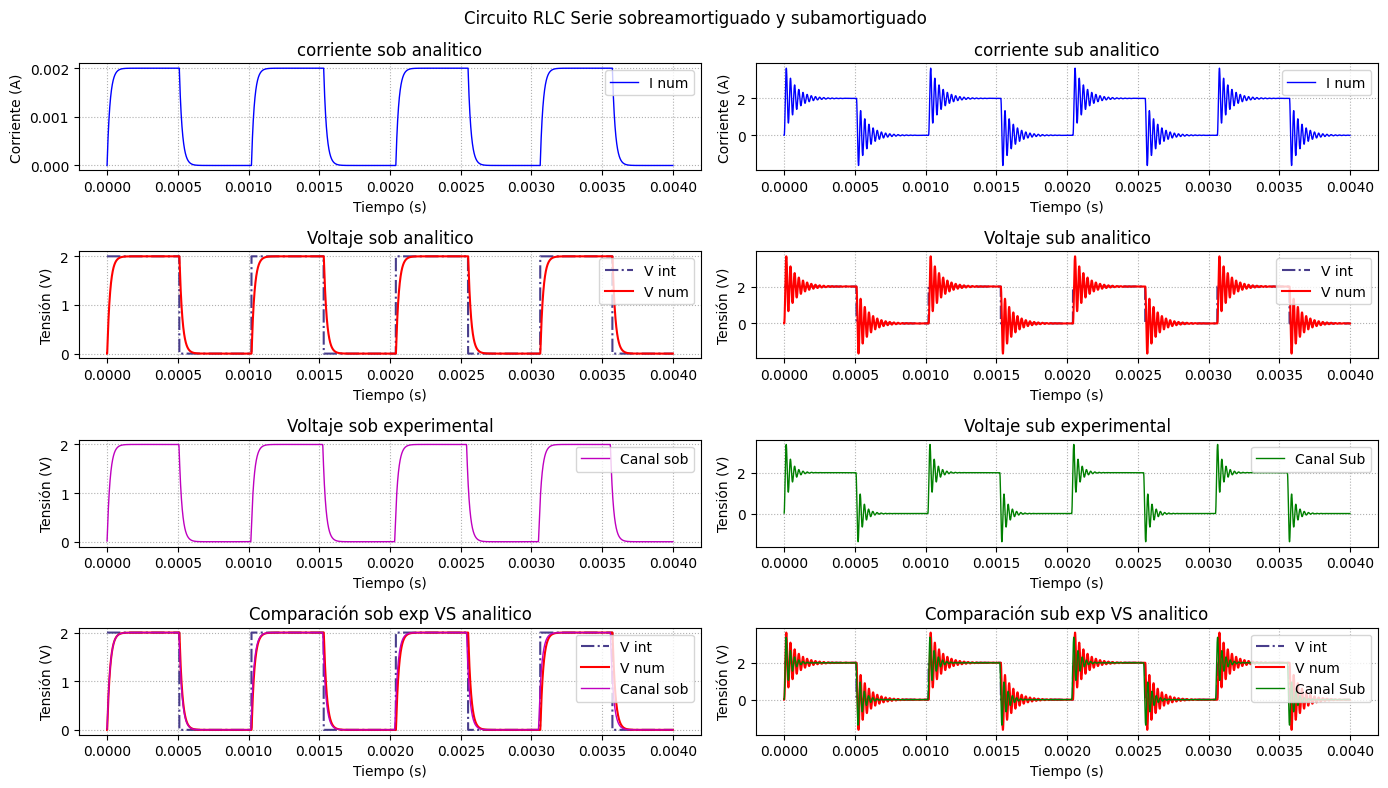

In [ ]:
import numpy as np                                          # Importamos numpy para hacer acercamiento numérico
import matplotlib.pyplot as plt                             # Importamos matplot.pyplot para poder graficar
from scipy.signal import square                             # Importamos scipy para poder obtener una señal cuadrada
import pandas as pd                                         # Importamos pandas para poder usar datos externos

# Cargar datos desde el archivo CSV
ruta_archivo_sub = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RLCP-sub.CSV'
ruta_archivo_sob = '/content/drive/MyDrive/Colab Notebooks/Circuitos de corriente alterna/Graficas osciloscopio CDAC/Graficas/RLCP-sob.CSV'
datos_sub = pd.read_csv(ruta_archivo_sub)                   # Cargamos los datos del canal sub desde el archivo CSV
datos_sob = pd.read_csv(ruta_archivo_sob)                   # Cargamos los datos del canal sob desde el archivo CSV

dt = 5e-7                                                   # Intervalo de tiempo entre muestras
puntos = 8000                                               # Número total de puntos
puntos = puntos -1
t_tot = float(puntos*dt)                                    # Tiempo total de adquisición de datos
min = 25                                                    # Punto de inicio de adquisición de datos
max = puntos + min                                          # Punto final de adquisición de datos

canalsub = datos_sub['Y--Trace 1::[V_C: V(1)-V(0)]']        # Datos del canal sub
desfase1 = 0                                                # Desfase para ajustar la alineación de los datos del canal sub
canalsub = canalsub[min+desfase1:max+desfase1]              # Seleccionamos el rango de datos del canal sub

canalsob = datos_sob['Y--Trace 1::[V_C: V(1)-V(0)]']        # Datos del canal sob
desfase2 = 0                                                # Desfase para ajustar la alineación de los datos del canal sob
canalsob = canalsob[min+desfase2:max+desfase2]              # Seleccionamos el rango de datos del canal sob

canalsub_numeric = canalsub.astype(float)                   # Convertimos los datos del canal sub a tipo float
canalsob_numeric = canalsob.astype(float)                   # Convertimos los datos del canal sob a tipo float

C = 1e-9
L = 0.022
R = 20e3
R_1 = 1000
Vin = 2
f = 980
R_critico = (2*L)/np.sqrt(L*C)
wn = 1 / np.sqrt(L * C)
T = 2 * np.pi / wn

t = np.arange(0, t_tot, dt)
V_i = Vin/2 * square(2*np.pi*f*t) + Vin/2


A = np.array([[0, -1/L], [1/C, -1/(R*C)]])
A_1 = np.array([[0, -1/L], [1/C, -1/(R_1*C)]])
B = np.array([[1/L], [0]])
I = np.identity(np.shape(A)[0])

x = np.zeros((2, puntos))   # Solución
x_1 = np.zeros((2, puntos))   # Solución

for n in range(puntos - 1):
    x[:, n + 1] = np.dot((dt * A + I), x[:, n]) + dt * B.flatten() * V_i[n]

for n in range(puntos - 1):
    x_1[:, n + 1] = np.dot((dt * A_1 + I), x_1[:, n]) + dt * B.flatten() * V_i[n]

print(R_critico)

fig, axs = plt.subplots(4, 2, figsize=(14, 8))

axs[0, 0].set_title('corriente sob analitico')
axs[0, 0].plot(t, x_1[0, :], 'b',label='I num', lw = 1)
axs[0, 0].legend(loc='best')
axs[0, 0].set_xlabel('Tiempo (s)')
axs[0, 0].set_ylabel('Corriente (A)')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True, ls=':')

axs[0, 1].set_title('corriente sub analitico')
axs[0, 1].plot(t, x[1, :], 'b',label='I num', lw = 1)
axs[0, 1].legend(loc='best')
axs[0, 1].set_xlabel('Tiempo (s)')
axs[0, 1].set_ylabel('Corriente (A)')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True, ls=':')

axs[1, 1].set_title('Voltaje sub analitico')
axs[1, 1].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[1, 1].plot(t, x[1, :], 'r',label='V num')
axs[1, 1].legend(loc='best')
axs[1, 1].set_xlabel('Tiempo (s)')
axs[1, 1].set_ylabel('Tensión (V)')
axs[1, 1].legend(loc='upper right')
axs[1, 1].grid(True, ls=':')

axs[1, 0].set_title('Voltaje sob analitico')
axs[1, 0].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[1, 0].plot(t, x_1[1, :], 'r',label='V num')
axs[1, 0].legend(loc='best')
axs[1, 0].set_xlabel('Tiempo (s)')
axs[1, 0].set_ylabel('Tensión (V)')
axs[1, 0].legend(loc='upper right')
axs[1, 0].grid(True, ls=':')

axs[2, 0].set_title('Voltaje sob experimental')
axs[2, 0].plot(t, canalsob_numeric, label='Canal sob', lw=1, color='m')
axs[2, 0].set_xlabel('Tiempo (s)')
axs[2, 0].set_ylabel('Tensión (V)')
axs[2, 0].legend(loc='upper right')
axs[2, 0].grid(True, ls=':')

axs[2, 1].set_title('Voltaje sub experimental')
axs[2, 1].plot(t, canalsub_numeric, label='Canal Sub', lw=1, color='g')
axs[2, 1].set_xlabel('Tiempo (s)')
axs[2, 1].set_ylabel('Tensión (V)')
axs[2, 1].legend(loc='upper right')
axs[2, 1].grid(True, ls=':')

axs[3, 0].set_title('Comparación sob exp VS analitico')
axs[3, 0].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[3, 0].plot(t, x_1[1, :], 'r',label='V num')
axs[3, 0].plot(t, canalsob_numeric, label='Canal sob', lw=1, color='m')
axs[3, 0].set_xlabel('Tiempo (s)')
axs[3, 0].set_ylabel('Tensión (V)')
axs[3, 0].legend(loc='upper right')
axs[3, 0].grid(True, ls=':')

axs[3, 1].set_title('Comparación sub exp VS analitico')
axs[3, 1].plot(t, V_i, 'darkslateblue',ls='-.', label='V int')
axs[3, 1].plot(t, x[1, :], 'r', label='V num')
axs[3, 1].plot(t, canalsub_numeric, label='Canal Sub', lw=1, color='g')
axs[3, 1].set_xlabel('Tiempo (s)')
axs[3, 1].set_ylabel('Tensión (V)')
axs[3, 1].legend(loc='upper right')
axs[3, 1].grid(True, ls=':')

plt.suptitle('Circuito RLC Serie sobreamortiguado y subamortiguado')

plt.tight_layout()
plt.show()

# Conclusiones


Las conclusiones del presente informe se basan en el análisis detallado de la respuesta transitoria de circuitos RLC de segundo orden, tanto en configuraciones en paralelo como en serie. Durante el estudio, se exploraron los fenómenos de sobreamortiguación y subamortiguación, así como el impacto de la variación de los componentes del circuito en su respuesta transitoria. A través de esta introducción, se establece el contexto y la relevancia del análisis realizado, brindando una visión general de los hallazgos y conclusiones obtenidos durante el estudio de los circuitos RLC de segundo orden.

1. Respuesta transitoria de circuitos RLC de segundo orden: Se logró un análisis detallado de la respuesta transitoria de los circuitos RLC de segundo orden, comprendiendo cómo varía la corriente y la diferencia de potencial en función del tiempo tras la aplicación de una excitación.

2. Aplicación de principios de teoría de circuitos: Se aplicaron exitosamente los principios básicos de la teoría de circuitos para resolver analíticamente la respuesta de estos sistemas ante cambios de excitación, lo que permitió comprender mejor su comportamiento y sus características transitorias.

3. Caracterización de respuestas en casos de sobreamortiguación y subamortiguación: Se exploraron y caracterizaron las respuestas de los circuitos en casos de sobreamortiguación y subamortiguación, observando cómo varían los fenómenos de amortiguamiento en función de los parámetros del circuito.

4. Impacto de la frecuencia de excitación: Se investigó y evaluó el impacto de la frecuencia de excitación en la respuesta transitoria de los circuitos RLC de segundo orden, observando cómo afecta a la amplitud y frecuencia de las oscilaciones transitorias.

5. Influencia de la variación de la resistencia, inductancia y capacitancia: Se analizó la influencia de la variación de los componentes del circuito en la respuesta transitoria, identificando cómo cambios en la resistencia, inductancia y capacitancia afectan a la estabilidad y comportamiento del sistema.

Estas conclusiones proporcionan una comprensión más profunda del comportamiento transitorio de los circuitos RLC de segundo orden, así como de los factores que influyen en su respuesta y estabilidad.

## Referencias

1. Heath, M. T. (1997). Scientific Computing. New York: McGraw-Hill.

2. Tobon Llano, Luis Eduardo. (2018). Solución numérica de ecuaciones diferenciales parciales. En *Taller: Departamento de Electrónica y Ciencias de la Computación*, Pontificia Universidad Javeriana de Cali.

3. Lara Romero, L., Chávez Aliaga, Z., & Castañeda Vergara, J. (2019). *El Método de Diferencias Finitas: Teoría y Práctica*. Editado por Universidad Privada Antenor Orrego. Trujillo, Perú: Fondo Editorial UPAO.

4. Dorf, R. C. (1989). *Introduction to Electric Circuits*. Libro de texto, Hágalo usted mismo.

5. Toledo Castellanos, M. Á., del Bosque Alayón, R. A., Roig Vázquez, P. E., Campa Rojas, L., García García, Z., Brito, J. E., & Roa Hano, M. C. (2007). *Métodos Numéricos para Ingenieros* (5th ed.). México, D.F.: McGraw-Hill/Interamericana Editores, S.A. de C.V.

6. Valera Fernández, Á. (2016). *Modelado y control en el espacio de estados*. Editorial Universitat Politècnica de València.

7. Osorio Cordero, A. (2020). *Introducción a Sistemas Dinámicos*.

8. Salvador, A. (2016). *Sistemas Dinámicos Continuos*. Universidad Politécnica de Madrid.








####Elaborado por Juan Esteban Muñoz López.
####Estudiante del 5to semestre de Ingeniería electrónica.
####ID = 8972282